## Titanic Data Investigation

The sinking of Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the world.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

[Titanic Data](https://d17h27t6h515a5.cloudfront.net/topher/2016/September/57e9a84c_titanic-data/titanic-data.csv) - Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. You can view a description of this dataset on [Kaggle](https://www.kaggle.com/c/titanic/data), from where the data was obtained.

#### We will use the data to find answers to few questions like 

 -  Which gender had a better chance of survival ?
 -  Which social class had a better chance of survival ?
 -  Which age group had a better chance of survival ?
 -  Which one of Single, Husband, Father had a higher survival percent ?

### Description of the Dataset

titanic_data.csv:
    
Contains passenger information for passengerids 1-891:
    
```
survival        Survival (0 = No; 1 = Yes)
pclass          Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age in years
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
```

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


### Read the csv into a dataframe

In [97]:
titanic_df = pd.read_csv('titanic-data.csv')

In [98]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [99]:
titanic_df.info() # Shows metadata info of the df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


From above, we can see that the 'Age', 'Cabin' and 'Embarked' columns have missing entries.

In [100]:
titanic_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Graham, Mr. George Edward",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


From the above table we can deduce information like:
        
1. The most aged passenger was 80 years old.
2. The highest fare taken was $512.32920.
3. The average age of the passenger aboard was 29.69 years.
4. The mean survival stat was 0.3838 where 1='Survived' and 0='Not Survived',
5. The youngest passenger was 5 months old.

## Data Wrangling / Cleaning

#### Missing Ages
We will delete the data with missing ages because it doesn't make much sense to impute the ages neither with the average or using linear regression. 

In [101]:
titanic_df = titanic_df[titanic_df["Age"].notnull()]
len(titanic_df)

714

In [102]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
Cabin          185 non-null object
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


'Cabin','Name','Ticket','PassengerId','Embarked' columns are not required in our analysis thus we can remove them & reduce memory & cpu usage.

In [103]:
titanic_df = titanic_df.drop(['Cabin','Name','Ticket','PassengerId','Embarked'], axis=1)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 7 columns):
Survived    714 non-null int64
Pclass      714 non-null int64
Sex         714 non-null object
Age         714 non-null float64
SibSp       714 non-null int64
Parch       714 non-null int64
Fare        714 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 44.6+ KB


In [104]:
total_people = len(titanic_df)
survivors = len(titanic_df[titanic_df.Survived==1])
nonsurvivors = len(titanic_df[titanic_df.Survived==0])
males = len(titanic_df[titanic_df.Sex=='male'])
females = len(titanic_df[titanic_df.Sex=='female'])

male_survivors = len(titanic_df[titanic_df.Survived==1][titanic_df.Sex=='male'])
female_survivors = len(titanic_df[titanic_df.Survived==1][titanic_df.Sex=='female'])

child = len(titanic_df[titanic_df.Age<18])
adult = len(titanic_df[titanic_df.Age>18])

child_survivors = len(titanic_df[titanic_df.Survived==1][titanic_df.Age<18])
adult_survivors = len(titanic_df[titanic_df.Survived==1][titanic_df.Age>18])

print "total_people      :", total_people
print "survivors         :", survivors
print "nonsurvivors      :", nonsurvivors
print "males             :", males
print "females           :", females
print "male_survivors    :", male_survivors
print "female_survivors  :", female_survivors
print "child_survivors   :", child_survivors
print "adult_survivors   :", adult_survivors

print "% survivors       :", float(survivors)*100/total_people

print "% male_survivors  :", float(male_survivors)*100/males
print "% female_survivors:", float(female_survivors)*100/females

print "% child_survivors :", float(child_survivors)*100/child
print "% adult_survivors :", float(adult_survivors)*100/adult

total_people      : 714
survivors         : 290
nonsurvivors      : 424
males             : 453
females           : 261
male_survivors    : 93
female_survivors  : 197
child_survivors   : 61
adult_survivors   : 220
% survivors       : 40.6162464986
% male_survivors  : 20.5298013245
% female_survivors: 75.4789272031
% child_survivors : 53.982300885
% adult_survivors : 38.2608695652


 ### Which gender had a better chance of survival ?

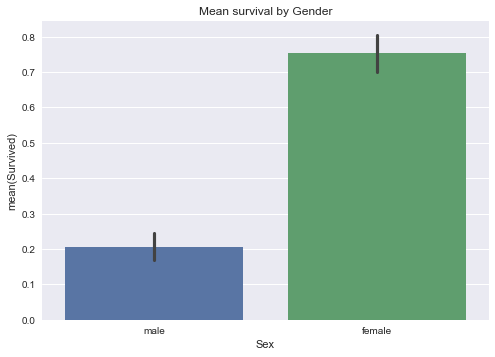

In [142]:
sns.set(style="darkgrid")
sns.barplot(data=titanic_df,x="Sex",y="Survived")
sns.plt.title('Mean survival by Gender')
sns.plt.show()

We can see clearly over here that the females had a considerable higher percentage of survival compared to males.

### Which age group had a better chance of survival ?

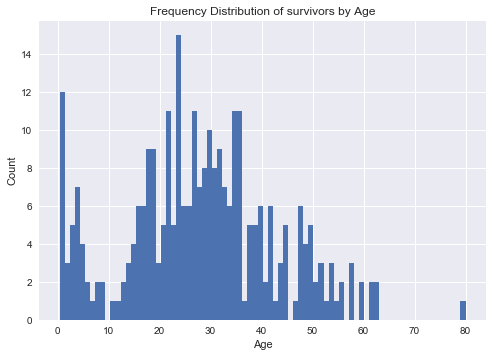

In [143]:
plt.title('Frequency Distribution of survivors by Age')
plt.xlabel('Age')
plt.ylabel('Count')
titanic_df['Age'][titanic_df.Survived==1].hist(bins=80)
plt.show()

In [144]:
def isChild(x):
    if x > 18:
        return 0
    else:
        return 1
titanic_df["IsChild"] = pd.Series(titanic_df["Age"].apply(isChild), index=titanic_df.index)

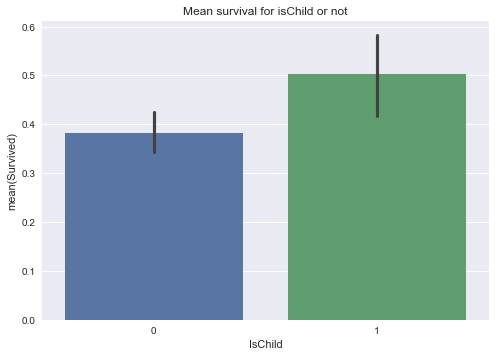

In [145]:
sns.set(style="darkgrid")
sns.barplot(data=titanic_df,x="IsChild",y="Survived")
sns.plt.title('Mean survival for isChild or not')
sns.plt.show()

And being a child also had better chances of survival.

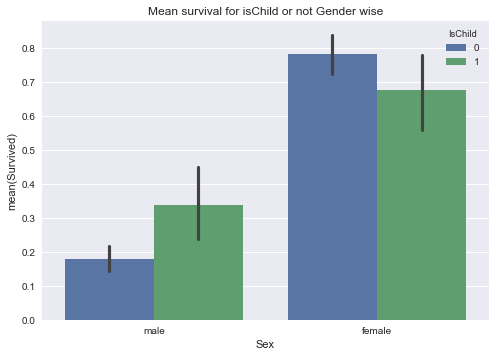

In [146]:
sns.barplot(data=titanic_df, x="Sex", y="Survived", hue="IsChild")
sns.plt.title('Mean survival for isChild or not Gender wise')
sns.plt.show()

Even amongst the children being female had a clear advantage

But Female adults had a higher mean of survival than the female child

### What is the best age to survive?

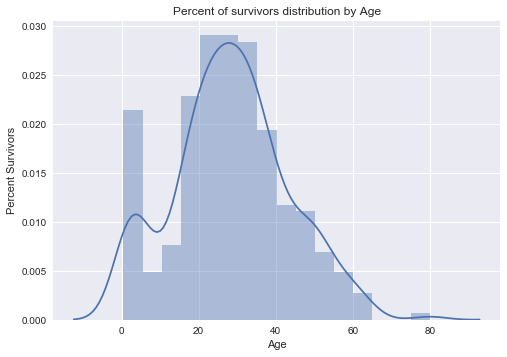

In [147]:
# survivors distributed by age.
survivors_ages = titanic_df[titanic_df["Survived"] == 1]["Age"]
ax = sns.distplot(survivors_ages)
ax.set(xlabel='Age', ylabel='Percent Survivors')
sns.plt.title('Percent of survivors distribution by Age')
sns.plt.show()

We can see that most of the survivors had an age from 20 to 40.

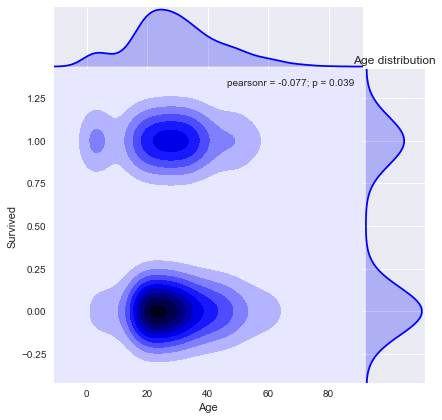

In [148]:
# Compare the ages of survived & not survived passengers
sns.jointplot("Age", "Survived", data=titanic_df, kind="kde", space=0, color="b")
plt.title('Age distribution')
sns.plt.show()

We also see that non survivors mostly had age between 20 and 40.

Thus to find best age of survival we will calculate the percentage of survivors for each age.

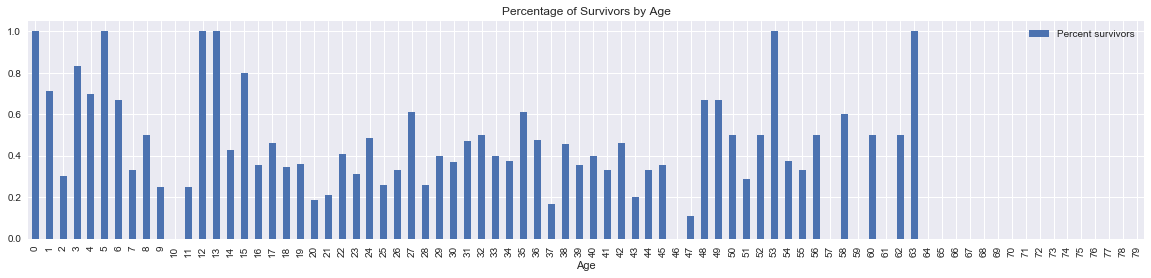

In [149]:
max_age = int(titanic_df["Age"].max())
age_dist = pd.DataFrame(index=xrange(max_age),columns=["Survived", "NotSurvived"])
age_dist = age_dist.fillna(0)
for age in age_dist.index:
    age_survive = titanic_df[titanic_df["Age"].astype(int) == age]["Survived"]
    age_dist.loc[age, "NotSurvived"] = sum(age_survive == 0)
    age_dist.loc[age, "Survived"] = sum(age_survive == 1)

survived_props = age_dist.Survived / age_dist.sum(axis="columns")
survived_props = survived_props.fillna(0)
survived_props.index.name = "Age"
survived_props.name = "Percent survivors"
survived_props.plot(kind="bar", figsize=(20,4),legend=True, title='Percentage of Survivors by Age')
sns.plt.show()

In [150]:
survived_props.head()

Age
0    1.000000
1    0.714286
2    0.300000
3    0.833333
4    0.700000
Name: Percent survivors, dtype: float64

This plot shows the % of survived person by age. We see that there are some ages with 100% of survivors i.e. 0, 5, 12, 13, 53 and 63 years old.

### Which social class had a better chance of survival ?

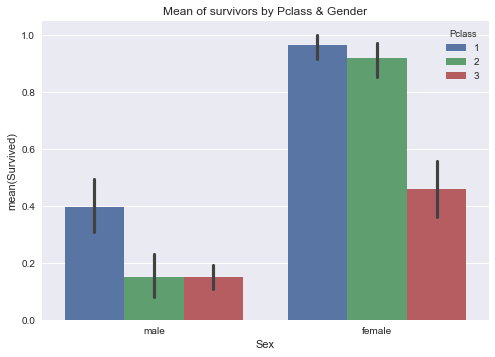

In [151]:
sns.barplot(data=titanic_df, x="Sex", y="Survived", hue="Pclass")
sns.plt.title('Mean of survivors by Pclass & Gender')
sns.plt.show()

Survived women in first and second classes doubles the mean of third class. But in case of men, just the first class have difference in survived mean. 

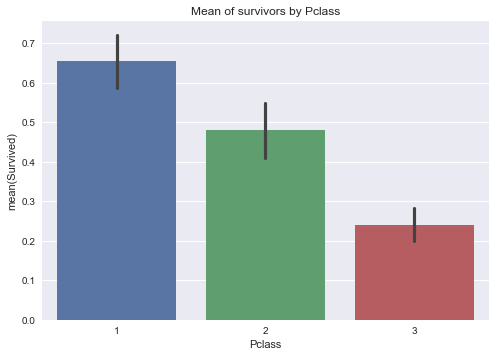

In [152]:
sns.barplot(data=titanic_df, x="Pclass", y="Survived")
sns.plt.title('Mean of survivors by Pclass')
sns.plt.show()

Thus the survival rate seems to be clearly influenced by the ticket class.

### Which one of Single, Husband, Father had a higher survival percent ?

To answer this question we will create a new categorized field *FamilyMan* with 3 values depending if he is Single, Husband, or Father(husband with kids).

In [153]:
import warnings
warnings.filterwarnings('ignore')

def isAdultMan(x):
    return x["IsChild"] == 0 and x["Sex"] == "male"

man_titanic_df = titanic_df[titanic_df.apply(isAdultMan, axis=1)]

def isFamilyMan(x):
    if x["SibSp"] > 0:
        if x["Parch"] > 0:
            return "Father"
        else:
            return "Husband"
    else:
        return "Single"

man_titanic_df["FamilyMan"] = pd.Series(man_titanic_df.apply(isFamilyMan, axis=1), index=man_titanic_df.index)

print man_titanic_df["FamilyMan"].value_counts()

Single     299
Husband     59
Father      24
Name: FamilyMan, dtype: int64


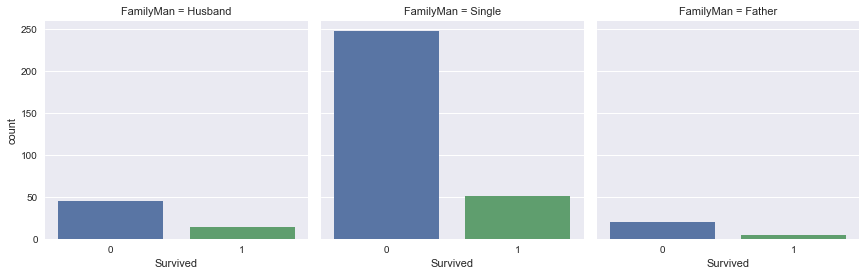

In [154]:
sns.factorplot(data=man_titanic_df,x="Survived", col="FamilyMan", kind="count")
sns.plt.show()

In [155]:
def percentSurvived(x, type):
    sub = x[x["FamilyMan"] == type]
    total = len(sub)
    survived = sum(sub["Survived"] == 1)
    return float(survived)/total * 100

print "Percent of Husbands survived:", percentSurvived(man_titanic_df,"Husband")
print "Percent of Singles survived:", percentSurvived(man_titanic_df,"Single")
print "Percent of Fathers survived:", percentSurvived(man_titanic_df,"Father")

Percent of Husbands survived: 23.7288135593
Percent of Singles survived: 17.0568561873
Percent of Fathers survived: 16.6666666667


### Age Distribution by Class

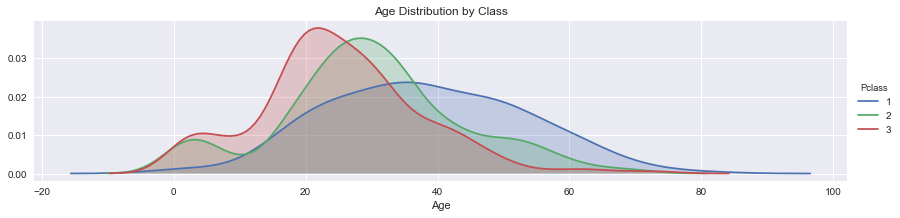

In [163]:
gCPS = sns.FacetGrid(titanic_df,hue='Pclass', aspect=4, hue_order=[1,2,3])
gCPS.map(sns.kdeplot,'Age', shade=True)
gCPS.add_legend()
sns.plt.title('Age Distribution by Class')
plt.show()

### Conclusions

#### Limitations of dataset
The are a number of limitations with the Titanic Dataset, which are caused by:
- Missing data
- Sample of the data not the population

The missing data and size of the sample could skew the results for example the missing ages. There were 53 ages missing for females and 124 ages missing for males. We have a choice to delete the missing data or impute the missing ages but
- deleting the rows with missing ages would limit the accuracy of the analysis of the gender and class, however the accuracy of the analysis of the Age would be more accurate
- generating ages based on the mean of ages could skew the results of the age analysis.


The difference between the sample and the population, we don't know how the sample was chosen from the actual population.We don't know if this is a random sample or if the selection of the data has intentional or unintentional bias/unbias.

So far we've assumed there is no difference between proportions for each sample. But what happens if this is not true? We can find this with a two-proportion z-test and determine wether the difference between two proportions is significant.

Lets conduct a hypothesis test to see if there is a significant difference between proportions. In first place, **male and female:**

$$H_{0} : P_{male} - P_{female} = 0$$ $$H_{A} : P_{male} - P_{female} \neq 0$$

In [157]:
males = titanic_df[titanic_df["Sex"]== "male"]
females = titanic_df[titanic_df["Sex"]== "female"]
total_people = len(males) + len(females)
print "total people :", total_people
print "males        :", len(males)
print "females      :", len(females)

total people : 714
males        : 453
females      : 261


To perform the test, these four counditions need to be met:
    
   * The sampling method for each population is simple random sampling.
   * The samples are independent.
   * Each sample includes at least 10 successes and 10 failures.
   * Each population is at least 20 times as big as its sample.
   
And in this case not all the conditions are true, the population is not 20 times bigger, but we will assume it's enough.

So lets continue the test, using the **two-proportion z-test** and a significance level ** $\alpha = 0.05 $ **

**Pooled sample proportion**:
$$p = \frac{p_{male} * n_{male} + p_{female} * n_{female}}{n_{male} + n_{female}}$$
**Standard error**:
$$SE = \sqrt{p * (1-p) * (\frac{1}{n_{male}} + \frac{1}{n_{female}})}$$
**Test statistic**:
$$z = \frac{p_{male} - p_{female}}{SE}$$


In [158]:
import math
p_males = float(len(males[males["Survived"] == 1])) / len(males)
p_females = float(len(females[females["Survived"] == 1])) / len(females)
p = (p_males * len(males) + p_females * len(females)) / total_people
SE = math.sqrt(p * ( 1 - p ) * ( float(1)/len(males) + float(1)/len(females) ))
z = (p_males - p_females) / SE

print "Pooled sample proportion  :", p
print "Standard Error            :", SE
print "Z statistic               :", z

Pooled sample proportion  : 0.406162464986
Standard Error            : 0.0381648418165
Z statistic               : -14.3978392843


**Given that z-score, the P-value is very very small (smaller than our significance level 0.05). So we can reject the null hypothesis and say that in this scenario there is a significant difference between proportions.**

Lets do the same with **child/adult** scenario:

In [159]:
child = titanic_df[titanic_df["IsChild"]== 1]
adult = titanic_df[titanic_df["IsChild"]== 0]
print "total people :", total_people
print "childs       :", len(child)
print "adults       :", len(adult)

total people : 714
childs       : 139
adults       : 575


In [160]:
p_child = float(len(child[child["Survived"] == 1])) / len(child)
p_adult = float(len(adult[adult["Survived"] == 1])) / len(adult)
p = (p_child * len(child) + p_adult * len(adult)) / total_people
SE = math.sqrt(p * ( 1 - p ) * ( float(1)/len(child) + float(1)/len(adult) ))
z = (p_child - p_adult) / SE

print "Pooled sample proportion  :", p
print "Standard Error            :", SE
print "Z statistic               :", z

Pooled sample proportion  : 0.406162464986
Standard Error            : 0.0464185423935
Z statistic               : 2.60646759703


And the P-value for P(z > 2.606) = 0.0039 in a two-tailed test is 0.0039 + 0.0039. So **P-value = 0.0078**, smaller than 0.05 and again the difference between proportions are significant. We can do this same test with many other answers (all where proportions are compared). 

**The main conclusion about these questions is that the data set is not a good sample to perform some analysis and made conclusions about the population.**

### References

- Kaggle titanic competition page (https://www.kaggle.com/c/titanic)
- https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic
- Seaborn statistical data visualization reference page (http://stanford.edu/~mwaskom/software/seaborn/)
- Pandas documentation (http://pandas.pydata.org/pandas-docs/stable/#)
- Test statistics for difference between proportions (http://stattrek.com/hypothesis-test/difference-in-proportions.aspx)
- http://www.dataiku.com/blog/2014/05/12/DSS-Titanic-Kaggle-part-1.html
- http://cs229.stanford.edu/proj2012/LamTang-TitanicMachineLearningFromDisaster.pdf
- http://www.anesi.com/titanic.htm
- https://www.snip2code.com/Snippet/582479/data-science-code